In [1]:
import sys
sys.path.append('myModules')

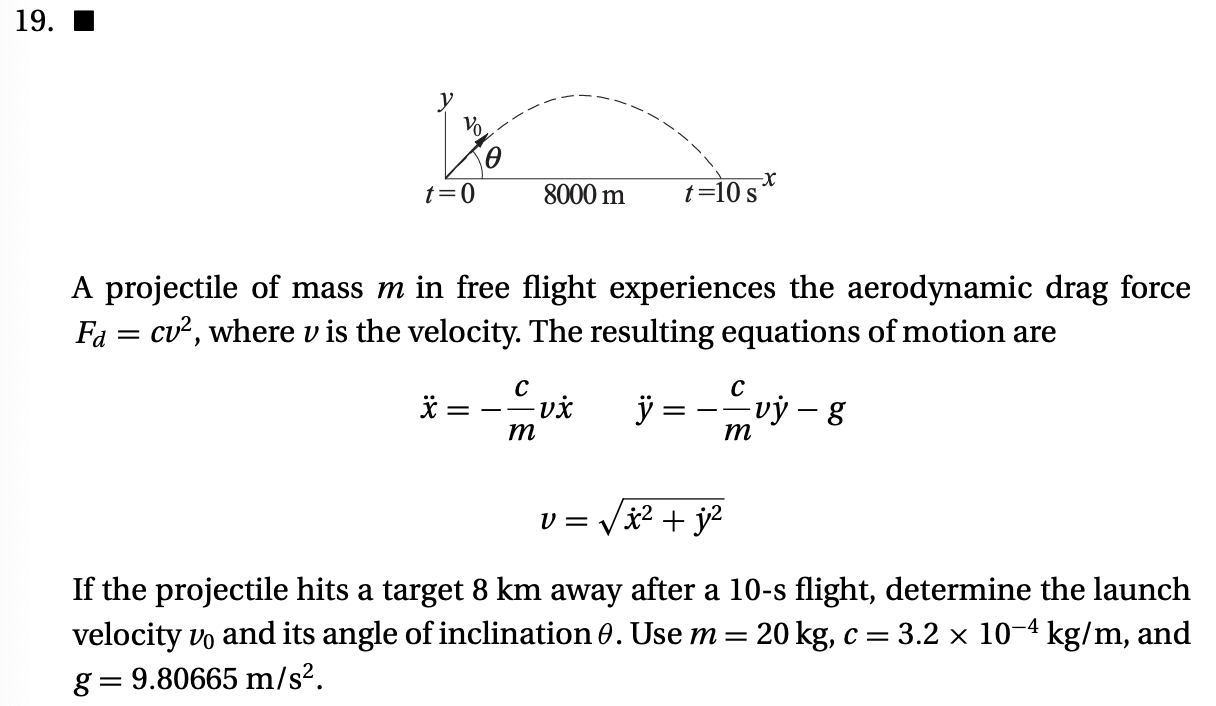

In [4]:
from IPython.display import Image
Image(filename='Chap8_Problem19.png',width="800")

x(0)=y(0)=0 , x(10)=8000,y(10)=0

In [5]:
# Problem 19.
import numpy as np
from RK4_integrate import *
from newtonRaphson2 import *
from printSoln import *
from math import sqrt
# Parameters
m = 20 # kg
c = 3.2e-4 # kg/m
g = 9.80665 # m/s^2
def initCond(u): # Init. values of [y,y’]; use ’u’ if unknown
    u1 = u[0]
    u2 = u[1]
    return np.array([0.0, u1, 0.0, u2])
    
def r(u): # Boundary condition residual--see Eq. (8.3)
    r = np.zeros(len(u))
    X,Y = RK4_integrate(F,xStart,initCond(u),xStop,h)
     # y = Y[len(Y) - 1]
    y = Y[-1] # find y at 2
    r[0] = y[0] - 8000 # check x values whether is 8000m
    r[1] = y[2] - 0.0 # check y values whether is 0m
    return r
    
def F(x,y): # First-order differential equations
    F = np.zeros(len(y))
    v = sqrt(y[1]**2 + y[3]**2)
    fac = c/m
    F[0] = y[1] # v_x
    F[1] = -fac*y[1] # a_x
    F[2] = y[3] # v_y
    F[3] = -fac*y[3] - g # a_y
    return F

xStart = 0.0 # Start of integration
xStop = 10.0 # End of integration
u = np.array([-1.0, 1.0]) # two trial value of unknown init. cond.
h = 0.1 # Step size
u = newtonRaphson2(r,u,1.0e-5) # Compute the correct initial condition
X,Y = RK4_integrate(F,xStart,initCond(u),xStop,h)
freq = 2 # Printout frequency
printSoln(X,Y,freq)
# input("\nPress return to exit")


   x   y[ 0 ]   y[ 1 ]   y[ 2 ]   y[ 3 ]  
   0.0000e+00    0.0000e+00    8.0006e+02    0.0000e+00    4.9035e+01 
   2.0000e-01    1.6001e+02    8.0006e+02    9.6108e+00    4.7073e+01 
   4.0000e-01    3.2002e+02    8.0006e+02    1.8829e+01    4.5112e+01 
   6.0000e-01    4.8004e+02    8.0006e+02    2.7655e+01    4.3150e+01 
   8.0000e-01    6.4005e+02    8.0005e+02    3.6089e+01    4.1189e+01 
   1.0000e+00    8.0006e+02    8.0005e+02    4.4131e+01    3.9227e+01 
   1.2000e+00    9.6007e+02    8.0005e+02    5.1780e+01    3.7266e+01 
   1.4000e+00    1.1201e+03    8.0005e+02    5.9037e+01    3.5304e+01 
   1.6000e+00    1.2801e+03    8.0004e+02    6.5902e+01    3.3343e+01 
   1.8000e+00    1.4401e+03    8.0004e+02    7.2374e+01    3.1381e+01 
   2.0000e+00    1.6001e+03    8.0004e+02    7.8454e+01    2.9420e+01 
   2.2000e+00    1.7601e+03    8.0004e+02    8.4142e+01    2.7459e+01 
   2.4000e+00    1.9201e+03    8.0003e+02    8.9438e+01    2.5497e+01 
   2.6000e+00    2.0801e+03    8.

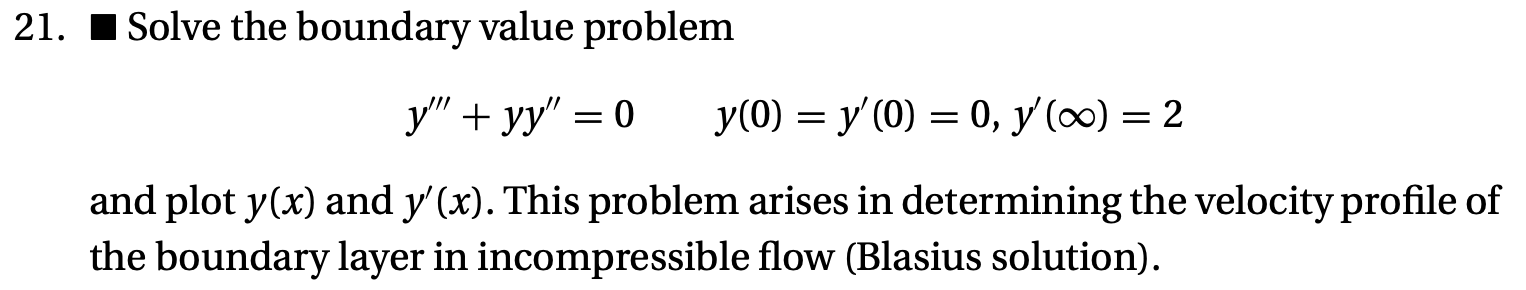

In [6]:
Image(filename='21.png',width="700")

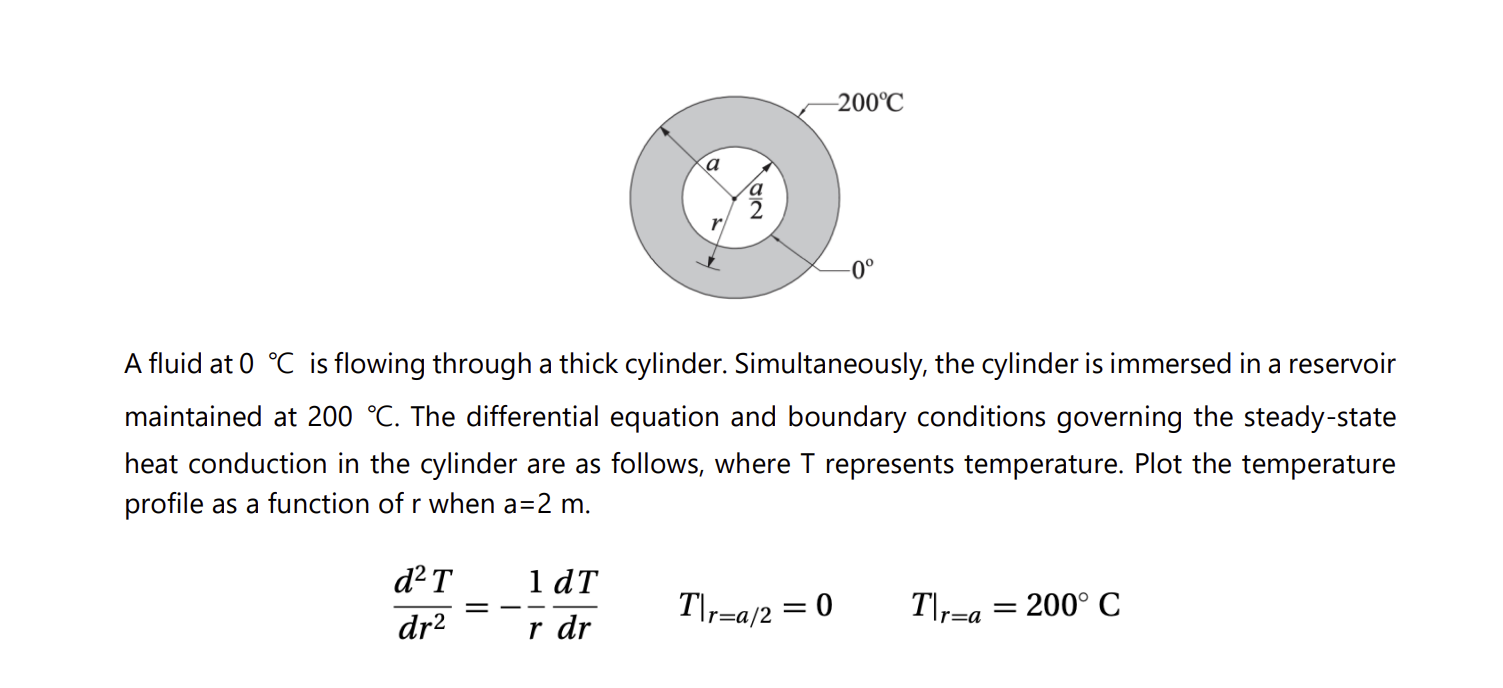

In [8]:
from IPython.display import Image
Image(filename='24.png',width="800")

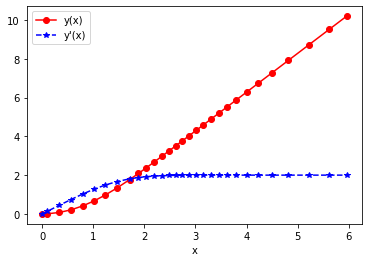

In [7]:
# Problem 19.
import numpy as np
# from run_kut5 import *
from RK5_integrate import *
from ridder import *
# from linInterp import *
# from newtonRaphson2 import *
from printSoln import *


def initCond(u): # Init. values of [y,y’]; use ’u’ if unknown
    return np.array([0.0, 0.0, u])

def r(u): # Boundary condition residual--see Eq. (8.3)
    X,Y = RK5_integrate(F,xStart,initCond(u),xStop,h)
# y = Y[len(Y) - 1]
    y = Y[-1] # find y at 2
    r = y[1] - 2 # check x values whether is 2
    return r

def F(x,y): # First-order differential equations
    F = np.zeros(3) 
    F[0] = y[1] # v_x
    
    F[1] = y[2]
    F[2] = -y[0]*y[2]
    return F


xStart = 0.0 # Start of integration
xStop = 6.0 # End of integration
u = np.array([1.0, 120]) # two trial value of unknown init. cond.
h = 0.1 # Step size
u = ridder(r,u[0],u[1]) # Compute the correct initial condition
X,Y = RK5_integrate(F,xStart,initCond(u),xStop,h)
# freq = 2 # Printout frequency
# printSoln(X,Y,freq)
# input("\nPress return to exit")
import matplotlib.pyplot as plt
plt.plot(X,Y[:,0],'o-r',label='y(x)')
plt.plot(X,Y[:,1],'*--b',label="y'(x)")
# plt.xlabel(r'$\xi$')
plt.xlabel('x')
plt.legend()
# plt.ylabel('Displacement v')
plt.show()



   x   y[ 0 ]   y[ 1 ]  
   1.0000e+00    0.0000e+00    2.8854e+02 
   1.1000e+00    2.7501e+01    2.6231e+02 
   1.2000e+00    5.2607e+01    2.4045e+02 
   1.3000e+00    7.5702e+01    2.2195e+02 
   1.4000e+00    9.7085e+01    2.0610e+02 
   1.5000e+00    1.1699e+02    1.9236e+02 
   1.6000e+00    1.3561e+02    1.8034e+02 
   1.7000e+00    1.5311e+02    1.6973e+02 
   1.8000e+00    1.6960e+02    1.6030e+02 
   1.9000e+00    1.8520e+02    1.5186e+02 
   2.0000e+00    2.0000e+02    1.4427e+02 


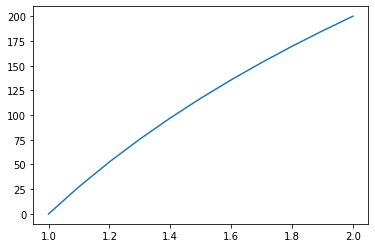

In [9]:
def initCond(u): # Init. values of [y,y’]; use ’u’ if unknown
    return np.array([0.0, u])
    
def r(u): # Boundary condition residual--see Eq. (8.3)
#    r = np.zeros(len(u))
    X,Y = RK4_integrate(F,x,initCond(u),xStop,h)
    y = Y[-1] # find y at 2
    r = y[0] - 200 # check x values whether is 8000m
    return r
    
def F(x,y): # First-order differential equations
    F = np.zeros(2)
    F[0] = y[1] # v_x
    F[1] = -1/x *y[1]
    return F

x = 1 # Start of integration
xStop = 2 # End of integration
u1=1
u2=2

h = 0.1 # Step size
u = np.array([-1.0, 1.0]) # two trial value of unknown init. cond.
#u = newtonRaphson2(r,u,1.0e-5) -> r이 연립방정식일때 답 찾는 식 임.
u = ridder(r,u1,u2) # Compute the correct initial condition - two points
X,Y = RK4_integrate(F,x,initCond(u),xStop,h)
plt.plot(X,Y[:,0])
freq = 3 # Printout frequency
printSoln(X,Y,1)

In [ ]:
F = np.zeros(2)
F[0] = 0.0 # v_x
F[1] = 1.0
F

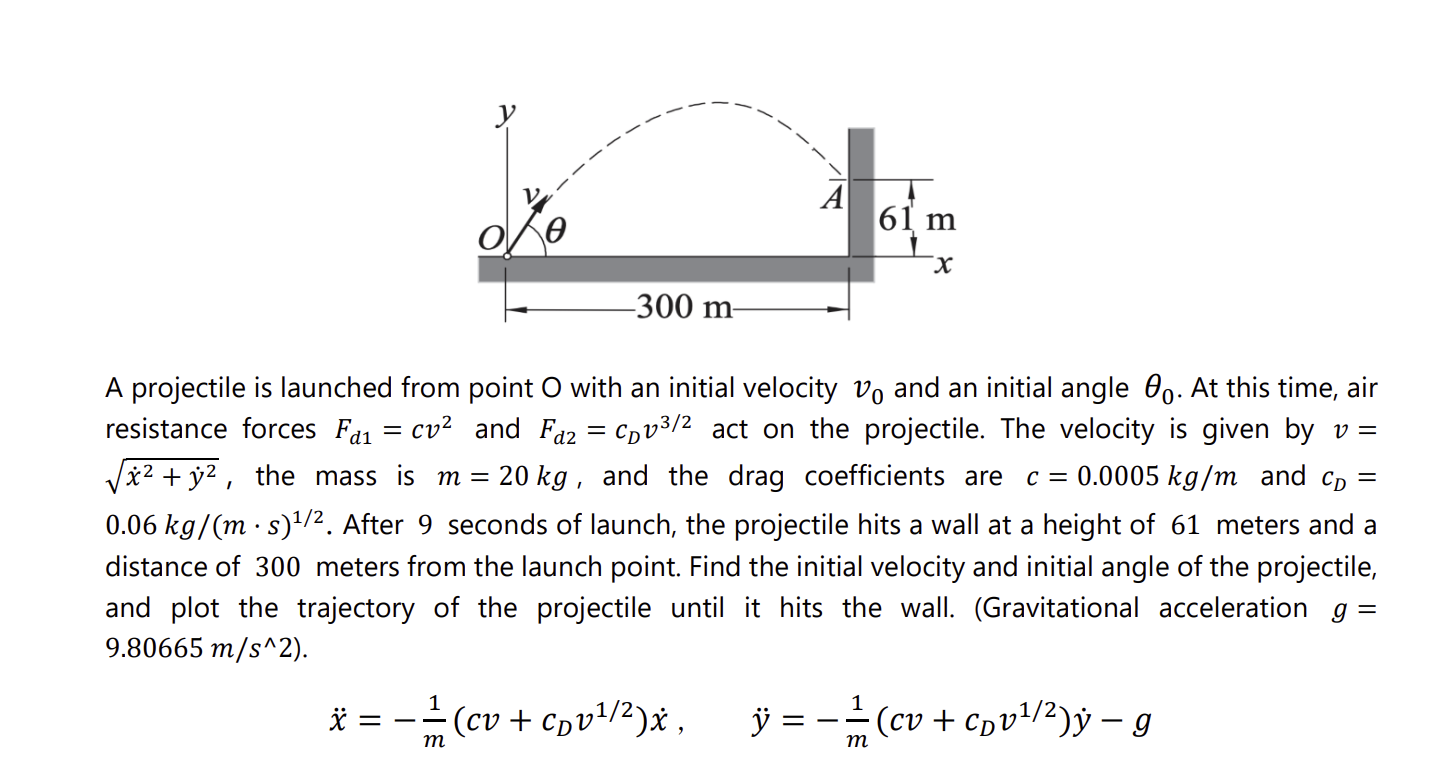

In [10]:
from IPython.display import Image
Image(filename='15.png',width="800")

x(0) = 0 ,y(0)=0 , x(9)=300 ,y(9)=61

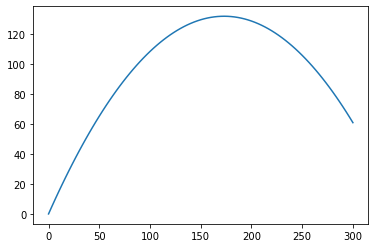

In [11]:
import numpy as np
from RK4_integrate import *
from newtonRaphson2 import *
from printSoln import *
from math import sqrt
# Parameters
m = 20 # kg
c = 3.2e-4 # kg/m
g = 9.80665 # m/s^2
def initCond(u): # Init. values of [y,y’]; use ’u’ if unknown
    u1 = u[0]
    u2 = u[1]
    return np.array([0.0, u1, 0.0, u2])
    
def r(u): # Boundary condition residual--see Eq. (8.3)
    r = np.zeros(len(u))
    X,Y = RK4_integrate(F,xStart,initCond(u),xStop,h)
     # y = Y[len(Y) - 1]
    y = Y[-1] # find y at 2
    r[0] = y[0] - 300 # check x values whether is 8000m
    r[1] = y[2] - 61 # check y values whether is 0m
    return r
    
def F(x,y): # First-order differential equations
    F = np.zeros(len(y))
    v = sqrt(y[1]**2 + y[3]**2)
    fac = c/m
    F[0] = y[1] # v_x
    F[1] = -fac*y[1] # a_x
    F[2] = y[3] # v_y
    F[3] = -fac*y[3] - g # a_y
    return F

xStart = 0.0 # Start of integration
xStop = 9.0 # End of integration
u = np.array([-1.0, 1.0]) # two trial value of unknown init. cond.
h = 0.1 # Step size
u = newtonRaphson2(r,u,1.0e-5) # Compute the correct initial condition
X,Y = RK4_integrate(F,xStart,initCond(u),xStop,h)
plt.plot(Y[:,0],Y[:,2])

Final energy : 0.5000 hbar omega



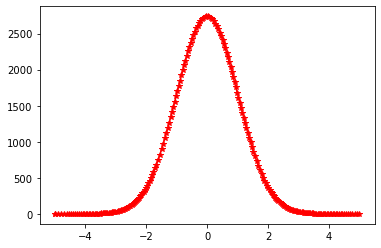

Final energy : 1.5000 hbar omega



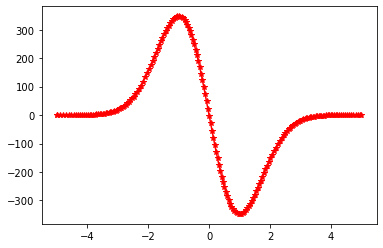

Final energy : 2.5000 hbar omega



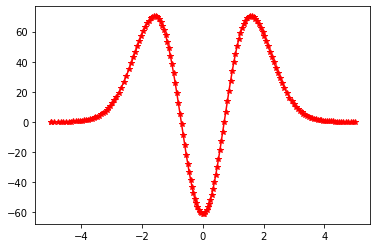

Final energy : 3.5000 hbar omega



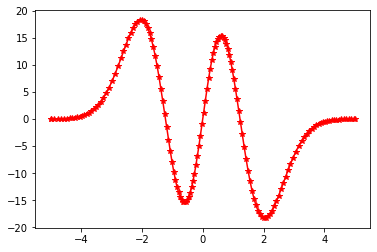

In [3]:
# The Harmonic oscillator

# -psi"(xi) = (xi^2 - Ep) *psi(xi)

import sys
sys.path.append('/Users/yjpark/Dropbox/younju_srivani/Comphys2020/ModulePractice/myModules')

import numpy as np
from RK5_integrate import *


a  = 1 ; n = 1 ;
k  = (np.pi/a)*n ;   # y = A* sin(n*pi*x/L)    n = 1,2,3,4, ....
Ep = 0.1 

def initCond(u):  # Init. values of [y,y’]; use ’u’ if unknown
    return np.array([0.0, u])


he = 5   # Energy step size 
u  = 1   # Initial slope. This is not important.


#Ep = np.pi**2 + 1.e-4
Ep    = 0.1
neig  = 4 #4개의 고유값을 찾고 싶음.
Evals = np.zeros(neig)

for i in range(neig):  # Search for the three first eigenvalues
    he = 0.1    # Reset energy step
    Ep = Ep + he    # Initialize the next energy value to search
    ediff = (-1)**i  
                    # 탐색 과정의 방향성을 제어하는 역할을 하며, 홀수와 짝수 인덱스에서의 고유값 탐색 방향이 번갈아가며 조절됩니다.
                    # Set initial magnitude and sign of ediff 
                      # the signs change for odd and even eigenvalues

    while abs(ediff) > 1e-6 :        

        h  = 0.01
        ediffold = ediff
        Ep = Ep + he
#         print('Ep ',Ep,' he ',he)

        def F(x,y):       # First-order differential equations
            F = np.zeros(2)
            F[0] = y[1]
            F[1] = (x**2- Ep)*y[0]
            return F

        xStart  = -5      #  Start of integration
        xStop   = 5        #  End of integration

        X,Y = RK5_integrate(F,xStart,initCond(0.1),xStop,h)

        ediff = Y[-1,0] - 0   # Calculate the difference
#         
        esign = ediff*ediffold

        if (ediff*ediffold < 0):   #rootfincing
            Ep = Ep - he #이전의 고유값을 Ep에 저장.
            he = he/2
            ediff = ediffold
        
    print('Final energy : %0.4f hbar omega'%(Ep/2))
    print('')
    Evals[i] = Ep

    import matplotlib.pyplot as plt
    plt.plot(X,Y[:,0],'r-*')
    #plt.plot(X,yn[:],'r-*')
    plt.show()

# solve_ivp , solve_bvp

$$y'' +  exp(y) = 0$$
$$y(0) = y(1) = 0$$

In [ ]:
a=np.array([0,1,2])
b=np.array([3,4,5])
c=np.vstack((a,b))
c[0]

In [ ]:
# y' = y[1]
# y''= -exp(y[0])

def fun(x,y): # First-order differential equations
    F0 = y[1] # v_x
    F1 = -np.exp(y[0])
    return np.array([F0,F1])

def bc(ya, yb):
    return np.array([ya[0]-0, yb[0]-0])

x = np.linspace(0, 1, 5)

y_a = np.zeros((2, x.size)) #각 mesh에서의 초기값.
print(y_a)
y_b = np.zeros((2, x.size))
y_b[0] = 3
print(y_b)

from scipy.integrate import solve_bvp
res_a = solve_bvp(fun, bc, x, y_a)
res_b = solve_bvp(fun, bc, x, y_b)

x_plot = np.linspace(0, 1, 100)
y_plot_a = res_a.sol(x_plot)[0]
y_plot_b = res_b.sol(x_plot)[0]
import matplotlib.pyplot as plt
plt.plot(x_plot, y_plot_a, label='y_a')
plt.plot(x_plot, y_plot_b, label='y_b')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()



*sturm liouville*
$$y''+k^2y=0$$
$$y(0)=y(1)=0 , y'(0)=k$$

In [ ]:
def fun(x, y, p):
    k = p[0]
    return np.vstack((y[1], -k**2 * y[0]))

def bc(ya, yb, p):
    k = p[0]
    return np.array([ya[0], yb[0], ya[1] - k])

x = np.linspace(0, 1, 5)
y = np.zeros((2, x.size))
y[0, 1] = 1
y[0, 3] = -1 # y=sin(2*pi*x)를 얻기위한 초기값 설정.
print(x,y)
sol = solve_bvp(fun, bc, x, y, p=[6]) # p의 초기값을 6으로 설정.
sol #p : k값임.

x_plot = np.linspace(0, 1, 100)
y_plot = sol.sol(x_plot)[0]
plt.plot(x_plot, y_plot)
plt.xlabel("x")
plt.ylabel("y")
plt.show()